In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATASET = 'SA_2016_week_1_8.csv'
df_2016 = pd.read_csv(DATASET)

In [3]:
df_2016.head(3)

,Satisfaction Score,Schedule Pacing,Timestamp,Track,Year,location,week
0,6,3.0,8/5/2016 1:39:41,Unknown,2016,TP,7
1,8,3.0,8/5/2016 1:40:47,Unknown,2016,TP,7
2,8,3.0,8/5/2016 1:40:50,Unknown,2016,TP,7


# Satisfaction Scores throughout the weeks, via. Tracks.

In [5]:
# NPS segments all responses between 1 and 10 into three categories based on their sentiment:
# Promoter (9 – 10)
# Passive (7 – 8)
# Detractor (1 – 6)

In [6]:
promoters = df_2016[(df_2016['Satisfaction Score'] >= 9) & (df_2016['week'] == 8)]

In [7]:
passives = df_2016[(df_2016['Satisfaction Score'] <= 8) & (df_2016['Satisfaction Score'] >= 7) & (df_2016['week'] == 8)]

In [8]:
detractors = df_2016[df_2016['Satisfaction Score'] <= 6 & (df_2016['week'] == 8)]

In [9]:
# NPS = (Promoters - Detractors)  (Promoters + Passives + Detractors)
NPS = ((len(promoters) - len(detractors))/ (len(promoters) + len(passives) + len(detractors))) * 100

In [10]:
NPS

57.8125

# Questions to ask:
 1. Based on the tracks, what is the drop rate?
 2. What is the progression of satisfaction based on tracks
 3. Based on expections what is the increase and decrease from week 1 and week 8?
 4. Which track is most popular based on location? 
 5. In which city do we have the most promoters, passives, and/ or detractors?

## What is the progression of satisfaction based on tracks

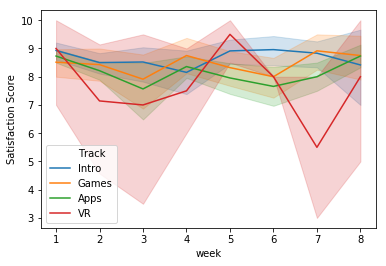

In [11]:
sb.lineplot(x="week", y='Satisfaction Score', hue="Track", data=df_2016[df_2016.Track != "Unknown"])

In [12]:
df_2016.head()

,Satisfaction Score,Schedule Pacing,Timestamp,Track,Year,location,week
0,6,3.0,8/5/2016 1:39:41,Unknown,2016,TP,7
1,8,3.0,8/5/2016 1:40:47,Unknown,2016,TP,7
2,8,3.0,8/5/2016 1:40:50,Unknown,2016,TP,7
3,8,4.0,8/5/2016 1:42:44,Unknown,2016,TP,7
4,10,4.0,8/5/2016 1:45:13,Unknown,2016,TP,7


# Drop Rate Visualizations

In [48]:
def plot_droprate_by_week_per_track(df_track):
    weeks, counts = sorted(df_track["week"].unique()), list()
    for week_num in weeks:
        counts.append(len(df_track[df_track["week"] == week_num]))
    return (weeks, counts)

In [17]:
df_2016["Track"].unique()

array(['Unknown', 'Intro', 'Games', 'Apps', 'VR'], dtype=object)

## Drop Rate per Week per Track: `All-in-One`

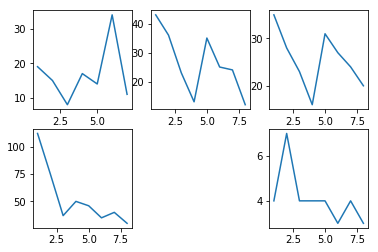

In [64]:
tracks = df_2016["Track"].unique().tolist()
subplots = [231, 232, 233, 234, 236]

fig = plt.figure()
ax1 = fig.add_subplot(subplots[0])
ax2 = fig.add_subplot(subplots[1])
ax3 = fig.add_subplot(subplots[2])
ax4 = fig.add_subplot(subplots[3])
ax5 = fig.add_subplot(subplots[4])
axes = [ax1, ax2, ax3, ax4, ax5]

for index, track in enumerate(tracks):
    df_track = df_2016[df_2016["Track"] == track]
    x, y = plot_droprate_by_week_per_track(df_track)
    axes[index].plot(x, y)

## Drop Rate per Week per Track: `One-in-All`

Text(0, 0.5, 'Drop Rate')

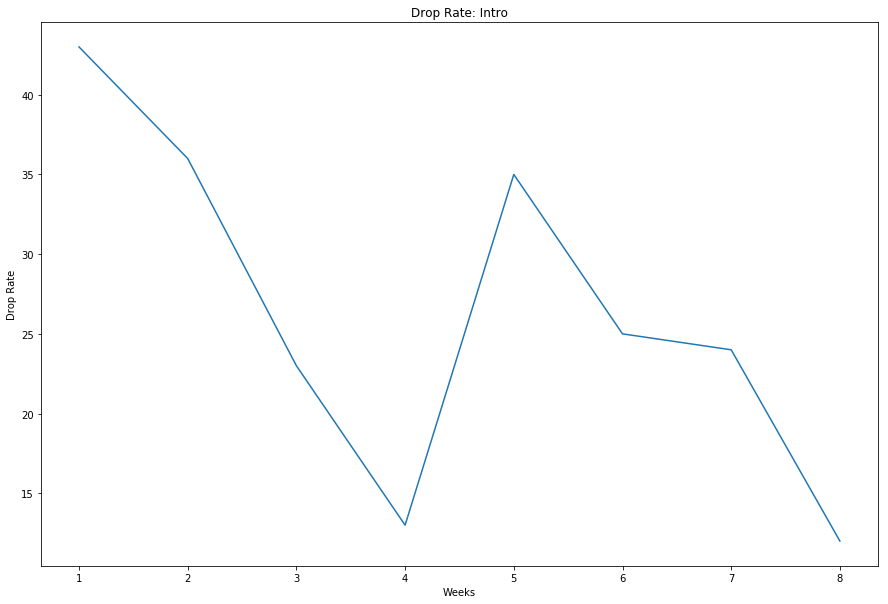

In [79]:
track = "Intro"
df_track = df_2016[df_2016["Track"] == track]

x, y = plot_droprate_by_week_per_track(df_track)
plt.figure(figsize=(15, 10))
plt.title("Drop Rate: {}".format(track))
plt.plot(x, y)
plt.xlabel("Weeks")
plt.ylabel("Drop Rate")